# Diplodatos Kaggle Competition

#### Autor: Ferraro, María Eugenia

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [32]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC

In [33]:
def transform_columns(df):
    df = df.drop(["Description"], axis=1)
    df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
    df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
    df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
    df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
    df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
    df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
    df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
    df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
    df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
    df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
    return df

In [106]:
def transform_data(df_train, df_test):
    #df_train = pd.read_csv(train_data_fname)
    #df_train = transform_columns(df_train)
    #df_test = pd.read_csv(test_data_fname)
    #df_test = transform_columns(df_test)
    df = pd.concat([df_train, df_test], sort=True)
    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

In [137]:
def new_features(df):
    undefined_breed =['Mixed Breed',
                      'Domestic Short Hair',
                      'Domestic Medium Hair',
                      'Domestic Long Hair']

    df['breed'] = 0
    df.loc[df.Breed1.isin(undefined_breed),'breed'] = 1

    df['black'] = 0
    df.loc[df.Color1=='Black','black'] =1
    
    df['state'] = 0
    df.loc[df.State==41326,'state'] = 1
    
    df['age'] = 0
    df.loc[df.Age<5,'age'] = 1
    
    return df

### EXPLORACIÓN DE DATOS 

In [11]:
D_train = pd.read_csv("../data/train.csv")
D_test  = pd.read_csv("../data/test.csv")

train = transform_columns(D_train)
test = transform_columns(D_test)

In [13]:
train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
0,Cat,3,Tabby,N/A,Male,Black,White,N/A,S,S,N,F,F,Healthy,1,100,41326,2,0
1,Dog,4,Mixed Breed,N/A,Female,Black,Brown,N/A,M,S,T,T,F,Healthy,1,150,41401,2,3
2,Dog,1,Mixed Breed,N/A,Male,Black,N/A,N/A,M,S,N,F,F,Healthy,1,0,41326,2,4
3,Cat,3,Domestic Short Hair,N/A,Female,Cream,Gray,N/A,M,S,N,F,F,Healthy,1,0,41326,2,5
4,Cat,12,Domestic Long Hair,Domestic Long Hair,Male,Black,N/A,N/A,M,L,N,F,N/A,Healthy,1,300,41326,1,6


In [14]:
train.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'AdoptionSpeed',
       'PID'],
      dtype='object')

In [15]:
cplt = ['Type','AdoptionSpeed','Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health']

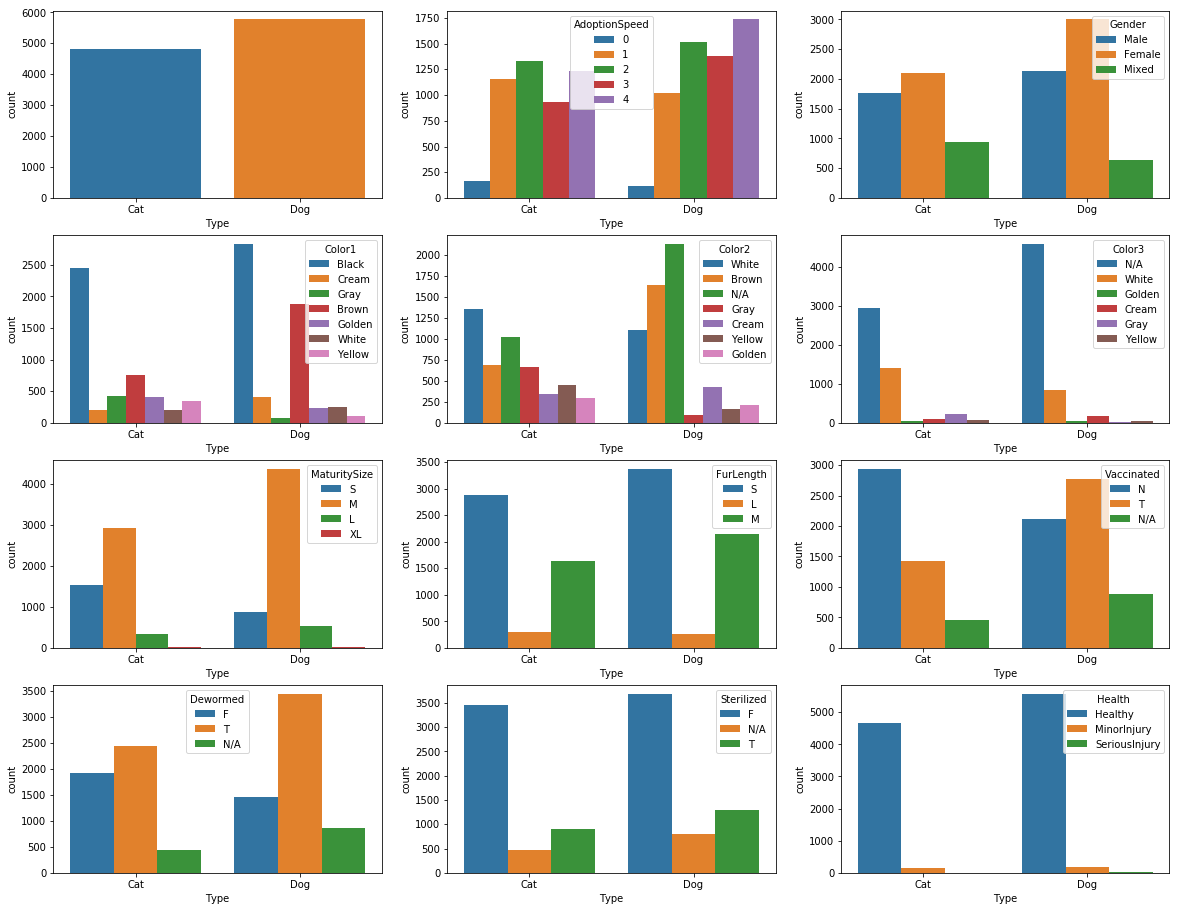

In [16]:
P=0
f=5
c=3

plt.figure(figsize=(20,20))

for column in cplt:
    P+=1
    plt.subplot(f,c,P)
    if column=="Type":
        sns.countplot(x="Type", data=train)
    else:
        sns.countplot(x="Type", hue=column, data=train)

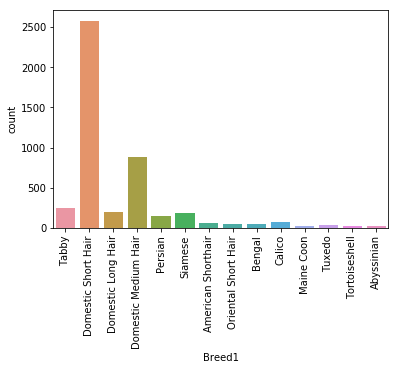

In [17]:
tipo = 'Cat'

data = train[(train.Type==tipo)].groupby('Breed1').Gender.count().reset_index().rename(columns={'Gender':'N'})
datac = data[data.N>20]

p = sns.countplot(x='Breed1', data=train[(train.Type==tipo)&(train.Breed1.isin(datac.Breed1.unique()))])
_ = plt.setp(p.get_xticklabels(), rotation=90)

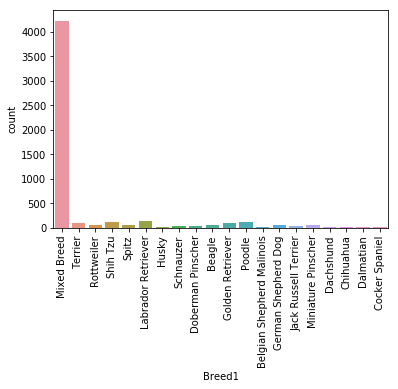

In [18]:
tipo = 'Dog'

data = train[(train.Type==tipo)].groupby('Breed1').Gender.count().reset_index().rename(columns={'Gender':'N'})
datac = data[data.N>20]

p = sns.countplot(x='Breed1', data=train[(train.Type==tipo)&(train.Breed1.isin(datac.Breed1.unique()))])
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [14]:
train.groupby('Breed1').Breed1.count().sort_values(ascending=False)

Breed1
Mixed Breed                              4228
Domestic Short Hair                      2579
Domestic Medium Hair                      881
Tabby                                     246
Domestic Long Hair                        194
Siamese                                   191
Labrador Retriever                        151
Persian                                   146
Shih Tzu                                  130
Poodle                                    115
Golden Retriever                          108
Terrier                                   101
Calico                                     75
German Shepherd Dog                        66
Beagle                                     65
American Shorthair                         63
Rottweiler                                 60
Spitz                                      58
Miniature Pinscher                         52
Oriental Short Hair                        49
Bengal                                     47
Schnauzer                  

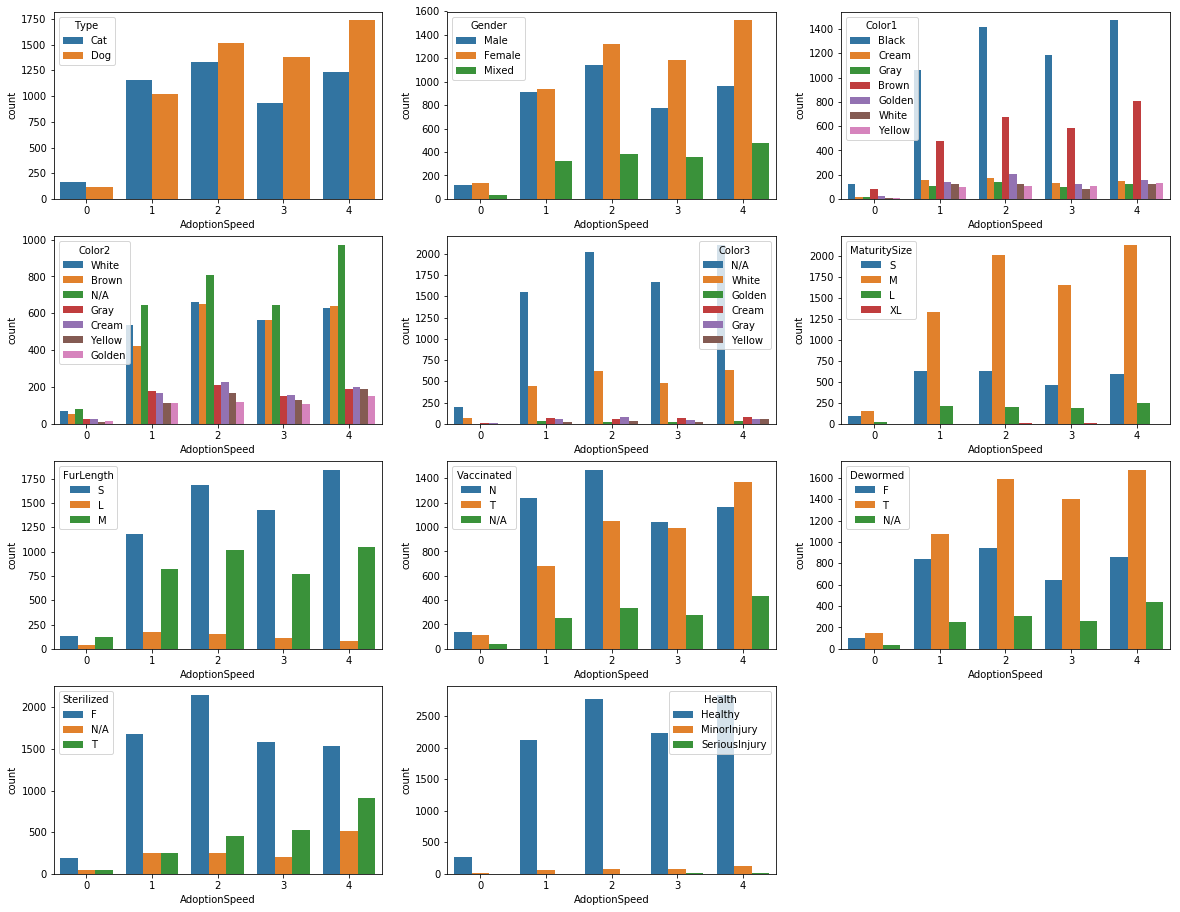

In [19]:
P=0
plt.figure(figsize=(20,20))
for column in cplt:
    if column=="AdoptionSpeed":
        continue
    P+=1
    plt.subplot(f,c,P)    
    sns.countplot(x="AdoptionSpeed", hue=column, data=train)

In [138]:
X_ = pd.read_csv("../data/train.csv")
XX_ = pd.read_csv("../data/test.csv")

In [139]:
X_.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [140]:
XX_.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'PID'],
      dtype='object')

In [141]:
X_  = transform_columns(X)
XX_ = transform_columns(XX)

In [142]:
X_ = new_features(X_)
XX_ = new_features(XX_)

In [143]:
X_sub = X_[['Type', 'Gender','Quantity', 'Fee', 'AdoptionSpeed',
       'PID', 'breed', 'black','state']]

In [144]:
XX_sub = XX_[['Type', 'Gender','Quantity', 'Fee', 
             'PID', 'breed', 'black','state']]

In [145]:
X_sub,y,XX_sub,yy = transform_data(X_sub,XX_sub)

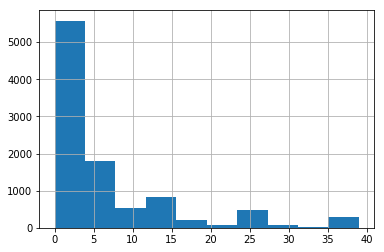

In [136]:
X_sub[X_sub.Age<40].Age.hist()

In [132]:
X_sub.describe()

,Age,Fee,PID,Quantity,black,breed,state,Gender_Female,Gender_Male,Gender_Mixed,Type_Cat,Type_Dog
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,10.520412,20.809960,7477.025799,1.584011,0.497732,0.744850,0.580042,0.482328,0.369306,0.148365,0.454734,0.545266
std,18.374027,78.397243,4310.921553,1.488348,0.500018,0.435966,0.493575,0.499711,0.482640,0.355478,0.497970,0.497970
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3768.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7473.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.000000,0.000000,11200.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,255.000000,3000.000000,14992.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RF

X_train, X_valid, y_train, y_valid = train_test_split(X_sub, y, test_size=0.2, random_state=113)

results = pd.DataFrame(columns=('clf', 'best_acc'))
tree_param = {'criterion':('gini', 'entropy'),'min_samples_leaf':(1,2,5,10),
              'min_samples_split':(10,20,30,50,80,100,200), 'n_estimators':(50,100,200,300),
              'class_weight':(None,'balanced')}
tree = RF(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.3191964989156863
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
The best classifier so far is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [79]:
X_sub.shape, XX_sub.shape
yy = results.clf.iloc[0].predict(XX_sub.drop(["PID"], axis=1))
yy = yy.astype(np.int)
submission = pd.DataFrame(list(zip(XX_sub.PID, yy)), columns=["PID", "AdoptionSpeed"])
submission.to_csv("../data/submission_.csv", header=True, index=False)

In [30]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [23]:
X.describe()

,Age,Fee,PID,Quantity,State,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,...,MaturitySize_S,MaturitySize_XL,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.0,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,10.520412,20.809960,7477.025799,1.584011,41345.994613,0.001985,0.000189,0.000095,0.000095,0.0,...,0.227178,0.002174,0.674164,0.118976,0.206861,0.454734,0.545266,0.477036,0.126347,0.396617
std,18.374027,78.397243,4310.921553,1.488348,32.409109,0.044506,0.013747,0.009721,0.009721,0.0,...,0.419028,0.046572,0.468709,0.323775,0.405074,0.497970,0.497970,0.499496,0.332255,0.489218
min,0.000000,0.000000,0.000000,1.000000,41324.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3768.250000,1.000000,41326.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7473.500000,1.000000,41326.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,11200.750000,1.000000,41401.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,255.000000,3000.000000,14992.000000,20.000000,41415.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Create the model and evaluate it

In [58]:
estadisticos = X.describe()

for columna in estadisticos:
    minimo = estadisticos[columna]['min']
    maximo = estadisticos[columna]['max']
    if maximo==1.0 or maximo==0:
        continue
    print(columna,' min: ',minimo,' maximo: ',maximo,end='\n')

Age  min:  0.0  maximo:  255.0
Fee  min:  0.0  maximo:  3000.0
PID  min:  0.0  maximo:  14992.0
Quantity  min:  1.0  maximo:  20.0
State  min:  41324.0  maximo:  41415.0


In [59]:
col_norm = ['Age','Fee','Quantity','State']

In [61]:
X_norm = X.copy()

In [63]:
for columna in col_norm:
    minimo = X_norm[columna].min()
    maximo = X_norm[columna].max()
    X_norm[columna] = (X_norm[columna]-minimo)/(maximo-minimo)

In [64]:
X_norm.describe()

,Age,Fee,PID,Quantity,State,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,...,MaturitySize_S,MaturitySize_XL,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.0,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,0.041257,0.006937,7477.025799,0.030737,0.241699,0.001985,0.000189,0.000095,0.000095,0.0,...,0.227178,0.002174,0.674164,0.118976,0.206861,0.454734,0.545266,0.477036,0.126347,0.396617
std,0.072055,0.026132,4310.921553,0.078334,0.356144,0.044506,0.013747,0.009721,0.009721,0.0,...,0.419028,0.046572,0.468709,0.323775,0.405074,0.497970,0.497970,0.499496,0.332255,0.489218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007843,0.000000,3768.250000,0.000000,0.021978,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011765,0.000000,7473.500000,0.000000,0.021978,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.047059,0.000000,11200.750000,0.000000,0.846154,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,14992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it couldn be useful for you depending on your approach)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

results = pd.DataFrame(columns=('clf', 'best_acc'))


tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
              'min_samples_split':(2, 3, 5, 10, 50, 100)}

tree     = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=5, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_

print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)

results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.3564152268945115
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [70]:
len(X_norm.columns)

360

In [89]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it couldn be useful for you depending on your approach)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

results = pd.DataFrame(columns=('clf', 'best_acc'))


tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1,2,3,5,10,100),
              'min_samples_split':(2, 3, 5, 10, 50, 100,200)}

tree     = DT(class_weight='balanced' ,random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=15, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_

print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)

results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.31658428724334053
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [94]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, cohen_kappa_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz

import matplotlib.pyplot as plt
import seaborn as sn
from ml.visualization import plot_confusion_matrix, plot_learning_curve
from matplotlib import cm
#import graphviz


cmap = cm.get_cmap('Spectral')     #colormap para graficos


In [104]:
X_train, X_valid, y_train, y_valid = train_test_split(X_norm, y, test_size=0.3, random_state=42)


In [105]:
labels = ['0','1','2','3','4']

---------------------------------------------------------------------------
---------------------------------------------------------------------------
                            MÉTRICA: ACCURACY
---------------------------------------------------------------------------
---------------------------------------------------------------------------


*********************************
*    FUNCIÓN DE COSTE: HINGE    *
*********************************


.:EXPLORACIÓN DE HIPERPARÁMETROS PARA "HINGE"


..:Mejor conjunto de parámetros:
       {'alpha': 0.21544346900318845, 'eta0': 10.0, 'learning_rate': 'constant'}


..:Puntajes de la grilla a medida que mejora accuracy o varianza:

       Exactitud: 0.227 (+/-0.010086) para los parámetros {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'constant'}
       Exactitud: 0.227 (+/-0.010086) para los parámetros {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'constant'}
       Exactitud: 0.262 (+/-0.000798) para los parámetros {'alpha': 0.0

**************************************
*    FUNCIÓN DE COSTE: PERCEPTRON    *
**************************************


.:EXPLORACIÓN DE HIPERPARÁMETROS PARA "PERCEPTRON"


..:Mejor conjunto de parámetros:
       {'alpha': 0.21544346900318845, 'eta0': 10.0, 'learning_rate': 'constant'}


..:Puntajes de la grilla a medida que mejora accuracy o varianza:

       Exactitud: 0.239 (+/-0.000972) para los parámetros {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'constant'}
       Exactitud: 0.239 (+/-0.000972) para los parámetros {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'constant'}
       Exactitud: 0.251 (+/-0.001024) para los parámetros {'alpha': 0.0001, 'eta0': 0.00035938136638046257, 'learning_rate': 'constant'}
       Exactitud: 0.252 (+/-0.000761) para los parámetros {'alpha': 0.0001, 'eta0': 0.004641588833612782, 'learning_rate': 'constant'}
       Exactitud: 0.252 (+/-0.000761) para los parámetros {'alpha': 0.0001, 'eta0': 0.004641588833612782, 'learning_rate': 'constan

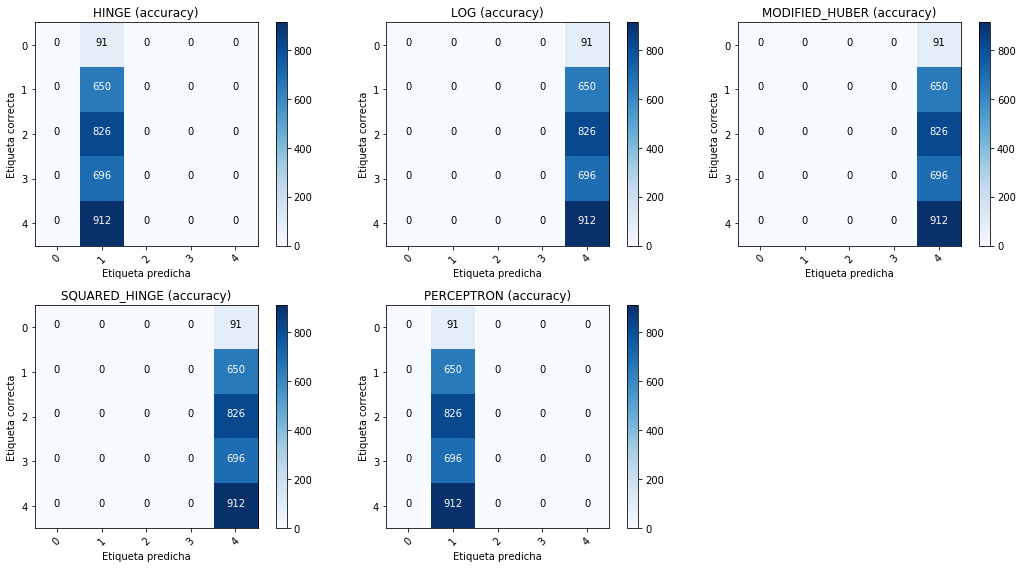





---------------------------------------------------------------------------
---------------------------------------------------------------------------
                            MÉTRICA: PRECISION
---------------------------------------------------------------------------
---------------------------------------------------------------------------




ValueError: Target is multiclass but average='binary'. Please choose another average setting.

<Figure size 1080x576 with 0 Axes>

In [106]:
loss_function = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
metrics = ['accuracy','precision','recall','f1','roc_auc']

n=10
alphas= np.logspace(-4, 1, n)
etas= np.logspace(-4, 1, n)

exploring_params =  {'learning_rate': ['constant'],
                     'eta0': etas, 
                     'alpha': alphas  # Tasa de regularización
                    }


for metrica in metrics:
    print('---------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------')
    print('                            MÉTRICA: '+metrica.upper())
    print('---------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------',end='\n\n\n')

    plt.figure(figsize=(15,8))
    for idx, loss in enumerate(loss_function, start=1):
        clfn = SGDClassifier(loss=loss, tol=1e-3, random_state=42)
        model = GridSearchCV(clfn, exploring_params, cv=5, scoring=metrica)
        model.fit(X_train, y_train)
        print('*****'+'*'*len('FUNCIÓN DE COSTE :'+loss.upper())+'*****')
        print('*    FUNCIÓN DE COSTE: '+loss.upper()+'    *')
        print('*****'+'*'*len('FUNCIÓN DE COSTE :'+loss.upper())+'*****', end="\n\n\n")
        
        print(".:EXPLORACIÓN DE HIPERPARÁMETROS PARA \"%s\"" % loss.upper(), end="\n\n\n")
        
        print("..:Mejor conjunto de parámetros:")
        print("      ",model.best_params_, end="\n\n\n")
    
        print('..:Puntajes de la grilla a medida que mejora '+metrica+' o varianza:', end="\n\n")
        means = model.cv_results_['mean_test_score']
        stds = model.cv_results_['std_test_score']
        
        scoremax=0 
        stdmin=1
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            if std<stdmin: 
                stdmin=std
                print("       Exactitud: %0.3f (+/-%0.06f) para los parámetros %r" % (mean, std ** 2, params))
            if mean>scoremax:
                scoremax=mean
                print("       Exactitud: %0.3f (+/-%0.06f) para los parámetros %r" % (mean, std ** 2, params))
        print("\n")
    
        print("..:Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
        y_true, y_pred = y_valid, model.predict(X_valid)
        print(classification_report(y_true, y_pred), end="\n\n\n\n")
        
    
        plt.subplot(2, 3, idx)
        plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                              classes=labels, title=loss.upper()+' ('+metrica+')')
    plt.savefig(metrica+'.pdf')
    plt.show()
    print('\n\n\n')

In [ ]:
y_val.value_counts()

In [103]:
len(y_train)

7407

In [79]:
results

,clf,best_acc
0,"DecisionTreeClassifier(class_weight=None, crit...",0.376112


**And finally**, we predict the unknown label for the testing set

In [136]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [137]:
yy = results.clf.iloc[0].predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

The last thing we do is generating a file that should be *submitted* on kaggle

In [138]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [139]:
submission.to_csv("../data/submission.csv", header=True, index=False)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_norm, y, test_size=0.2, random_state=42)


In [134]:
multi_class=['ovr','crammer_singer']
penalty = ['l2']
loss = ['hinge','squared_hinge']
dual = [True,False]
class_weight = [None,'balanced']
max_iter = [100,500,1000,10000]
C = [1e-5,1e-4,1e-3,1e-2,1,1e1,1e2,1e3,1e4]


for p in penalty:
    for l in loss:
        for d in dual:
            for mc in multi_class:
                for cw in class_weight:
                    for c in C:
                        for mi in max_iter:
                            clf = LinearSVC(penalty=p,
                                        loss=l,
                                        C=c,
                                        dual = d,
                                        multi_class=mc, 
                                        class_weight=cw,
                                        random_state=113,
                                        max_iter=mi)
                            clf.fit(X_train, y_train)
                            pred_train = clf.predict(X_train)
                            pred_valid = clf.predict(X_valid)
                            print('penalty: ',p)
                            print('loss: ',l)
                            print('class_weight: ',cw)
                            print('dual: ',d)
                            print('multi_class: ',mc) 
                            print('C: ',c) 
                            print('max_iter: ',mi)
                        
                            print('Exactitud \t%.2f \t|\t %.2f'% (accuracy_score(y_train,pred_train ),accuracy_score(y_valid,pred_valid)))
                            
                            print('****************************************************')

penalty:  l2
loss:  hinge
class_weight:  None
dual:  True
multi_class:  ovr
C:  1e-05
max_iter:  100
Exactitud 	0.21 	|	 0.21
****************************************************
penalty:  l2
loss:  hinge
class_weight:  None
dual:  True
multi_class:  ovr
C:  1e-05
max_iter:  500
Exactitud 	0.22 	|	 0.22
****************************************************
penalty:  l2
loss:  hinge
class_weight:  None
dual:  True
multi_class:  ovr
C:  1e-05
max_iter:  1000
Exactitud 	0.31 	|	 0.30
****************************************************
penalty:  l2
loss:  hinge
class_weight:  None
dual:  True
multi_class:  ovr
C:  1e-05
max_iter:  10000
Exactitud 	0.28 	|	 0.28
****************************************************
penalty:  l2
loss:  hinge
class_weight:  None
dual:  True
multi_class:  ovr
C:  0.0001
max_iter:  100
Exactitud 	0.28 	|	 0.28
****************************************************
penalty:  l2
loss:  hinge
class_weight:  None
dual:  True
multi_class:  ovr
C:  0.0001
max_iter:  500

penalty:  l2
loss:  hinge
class_weight:  balanced
dual:  True
multi_class:  ovr
C:  0.001
max_iter:  1000
Exactitud 	0.32 	|	 0.32
****************************************************
penalty:  l2
loss:  hinge
class_weight:  balanced
dual:  True
multi_class:  ovr
C:  0.001
max_iter:  10000
Exactitud 	0.28 	|	 0.28
****************************************************
penalty:  l2
loss:  hinge
class_weight:  balanced
dual:  True
multi_class:  ovr
C:  0.01
max_iter:  100
Exactitud 	0.18 	|	 0.16
****************************************************
penalty:  l2
loss:  hinge
class_weight:  balanced
dual:  True
multi_class:  ovr
C:  0.01
max_iter:  500
Exactitud 	0.33 	|	 0.31
****************************************************
penalty:  l2
loss:  hinge
class_weight:  balanced
dual:  True
multi_class:  ovr
C:  0.01
max_iter:  1000
Exactitud 	0.23 	|	 0.22
****************************************************
penalty:  l2
loss:  hinge
class_weight:  balanced
dual:  True
multi_class:  ovr
C:  

KeyboardInterrupt: 

In [ ]:
multi_class=['ovr','crammer_singer']
penalty = ['l2']
loss = ['hinge','squared_hinge']
dual = [True,False]
class_weight = [None,'balanced']
max_iter = [500,800,1000]
C = [1e-3,1e-2,1]

svc_params = {'penalty'     :penalty,
              'loss'        :loss,
              'C'           :C
              'dual'        :dual,
              'multi_class' :mc,
              'class_weight':cw,
              'max_iter'    :mi}



ree     = DT(class_weight='balanced' ,random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=15, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_

print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)

results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.ensemble import RandomForestClassifier as RF
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5,10),
              'min_samples_split':(2, 3, 5, 10, 50, 100), 'n_estimators':(100, 200)}
tree = RF(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.38688291742687736
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
The best classifier so far is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.ensemble import RandomForestClassifier as RF
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5,10),
              'min_samples_split':(2, 3, 5, 10, 50, 100), 'n_estimators':(100, 200)}
tree = RF(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.3773437720342212
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
The best classifier so far is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [140]:
results

,clf,best_acc
0,"(DecisionTreeClassifier(class_weight=None, cri...",0.377344


In [141]:
yy

array([4, 3, 4, ..., 1, 4, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

svc_params = {'loss'        :('hinge','squared_hinge'),
              'C'           :(1e-3,1e-2,1),
              'dual'        :(True,False),
              'multi_class' :('ovr','crammer_singer'),
              'class_weight':(None,'balanced'),
              'max_iter'    :(500,800,1000)}


clf   = LinearSVC(random_state=113)
model = GridSearchCV(clf, svc_params, scoring='accuracy', cv=3, iid=False)
model.fit(X_train.drop(["PID"], axis=1), y_train)
best_model = model.best_estimator_
print('Best Decision Tree accuracy: ', model.best_score_)
print(best_model)
results = results.append({'clf': best_model, 'best_acc': model.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT


results = pd.DataFrame(columns=('clf', 'best_acc'))

clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = RidgeClassifier(random_state=42)
clf5 = BernoulliNB()
clf6 = GaussianNB()

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y,
                                                      test_size=0.2,
                                                      random_state=42)


eclf1 = VotingClassifier(estimators=[('lr',clf1),
                                     ('rf',clf2),
                                     ('kn',clf3),
                                     ('rc',clf4),
                                     #('bb',clf5),
                                     #('gb',clf6)
                                    ],
                         voting='hard')

eclf1 = eclf1.fit(X_train.drop(["PID"], axis=1), y_train)
eclf1.score(X_valid.drop(["PID"], axis=1), y_valid)

/home/meugenia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/meugenia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/meugenia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.34341048653755313

In [91]:
max_ = 0
for i in np.arange(0,300):
    eclb1 = BaggingClassifier(base_estimator=None,
                  n_estimators=i+1,
                  max_samples=1.0,
                  max_features=30,
                  bootstrap=True,
                  bootstrap_features=False,
                  oob_score=False,
                  warm_start=False,
                  n_jobs=None,
                  random_state=113,
                  verbose=0)
    eclb1 = eclb1.fit(X_train.drop(["PID"], axis=1), y_train)
    score = eclb1.score(X_valid.drop(["PID"], axis=1), y_valid)
    if score>max_:
        max_=score
        print(i,score)

0 0.28719886632026453
2 0.31648559282002836
5 0.3273500236183278
13 0.32923948984411905
16 0.3377420878601795
17 0.34577231931979213
19 0.3471894189891356
81 0.3490788852149268
82 0.3504959848842702
88 0.3523854511100614
90 0.35427491733585265
93 0.3547472838923004
95 0.35710911667453943
105 0.35758148323098726
159 0.35899858290033065
163 0.35947094945677843
164 0.3608880491261219


In [85]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])